In [ ]:
                                          #HANDWRITTEN CHARACTER RECOGNITION
            -----------------------------------------------------------------------------------------------------------

In [3]:
!pip install emnist

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from emnist import extract_training_samples, extract_test_samples
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [3]:
# Load and preprocess the EMNIST dataset for letters
train_images, train_labels = extract_training_samples('letters')
test_images, test_labels = extract_test_samples('letters')

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels - 1) 
test_labels = to_categorical(test_labels - 1)

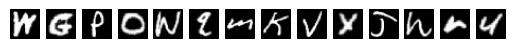

In [7]:
num_images_to_display = 14 

for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i+1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')  
    plt.axis('off')

plt.show()

In [4]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(26, activation='softmax'))


In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


Epoch 1/5
1950/1950 [==============================] - 17s 8ms/step - loss: 0.1490 - accuracy: 0.9470 - val_loss: 0.1936 - val_accuracy: 0.9366
Epoch 2/5
1950/1950 [==============================] - 15s 8ms/step - loss: 0.1364 - accuracy: 0.9502 - val_loss: 0.1896 - val_accuracy: 0.9380
Epoch 3/5
1950/1950 [==============================] - 16s 8ms/step - loss: 0.1247 - accuracy: 0.9536 - val_loss: 0.1892 - val_accuracy: 0.9399
Epoch 4/5
1950/1950 [==============================] - 16s 8ms/step - loss: 0.1167 - accuracy: 0.9568 - val_loss: 0.2003 - val_accuracy: 0.9378
Epoch 5/5
650/650 [==============================] - 3s 4ms/step - loss: 0.1912 - accuracy: 0.9396
Test accuracy: 0.9396153688430786


In [9]:
# Save the model
model.save('handwritten_english_character_recognition_model.keras')